In [80]:
#this cell has what you will need to import

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as optimise
from scipy import signal, ndimage
import re
import fnmatch

#I use these to loop over the directories
import os
from pathlib import Path

from astropy.io import fits #to read a fits file

#I use this package to convert from redshift to year
#Renyue implied doing this conversion is trivial
#but it is not. I suggest reading up on this
#package and then using it.
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.272)

In [3]:
def read_sun(director):
    
    
    masses=[] 
    sfrs=[]
    metals=[]
    ages=[]
    
    for filename in os.listdir(director):
        
        if filename.startswith('sun'):
            
            sfile=director+'/'+filename
                    
            hdul = fits.open(sfile)
            data=hdul[4].data                
            hdul.close()
                    
            #here I calculate the star formation rate as the total
            #mass of star particles less than a Myr old
            good_age=data['age']<1e6
            sfr = sum(data['mass'][good_age])/1e6
            
            masses.append(np.array(data['mass']))
            sfrs.append(sfr)
            metals.append(np.array(data['metallicity']))
            ages.append(np.array(data['age']))
                    

    masses=np.array(masses)
    sfrs=np.array(sfrs)
    metals=np.array(metals)
    ages=np.array(ages)
    

    return masses,sfrs,metals,ages

In [4]:
mass,sfr,metals,ages=read_sun('out01461')

In [442]:
def plot_mass_hist(galaxy):
    max_age = int(max(ages[galaxy]))
    digits = len(str(max_age))
    max_bin = (int(np.ceil(max_age / 10**(digits-1))) + 1) * 100
    fig = plt.figure()
    plt.hist(ages[galaxy], bins = np.arange(max_bin)*1e6, weights = mass[galaxy])
    plt.title("Histogram of star particles ages in galaxy %i, weighted by mass" % galaxy)
    plt.ylabel("Total star particle mass ($M_\odot$)")
    plt.xlabel("Star particle age (years)")
    return fig

In [6]:
def calc_mass_hist(galaxy):
    max_age = int(max(ages[galaxy]))
    digits = len(str(max_age))
    max_bin = int(np.ceil(max_age / 10**(digits-1))) * 100
    n, bins = np.histogram(ages[galaxy], bins = np.arange(max_bin)*1e6, weights = mass[galaxy])
    return n,bins

In [524]:
def sfr2(galaxy):
    max_age = int(max(ages[galaxy]))
    digits = len(str(max_age))
    max_bin = (int(np.ceil(max_age / 10**(digits-1))) +1) * 100
    n,bins = np.histogram(ages[galaxy], bins = np.arange(max_bin)*1e6, weights = mass[galaxy])
    bin_width = bins[1] - bins[0]
    sfr_array = n/bin_width
    #fig = plt.figure()
    #plt.plot(bins[:-1], sfr_array)
    #plt.title("Star formation rate of star particles in galaxy %i" % galaxy)
    #plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    #plt.xlabel("Star particle age (years)")
    return np.array(sfr_array), n, bins
    

In [33]:
def forward_sfr(galaxy):
    max_age = int(max(ages[galaxy]))
    digits = len(str(max_age))
    max_bin = int(np.ceil(max_age / 10**(digits-1))) * 100
    n,bins = np.histogram(ages[galaxy], bins = np.arange(max_bin)*1e6, weights = mass[galaxy])  
    bin_width = bins[1] - bins[0]
    sfr_array = []
    for i in range(len(n)-1):
        sfr_array.append((n[i+1] - n[i]) / bin_width)
    plt.plot(bins[:-2], sfr_array)
    plt.title("Star formation rate of star particles in galaxy %i" % galaxy)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")
    return np.array(sfr_array), n, bins

In [8]:
def backward_sfr(galaxy):
    max_age = int(max(ages[galaxy]))
    digits = len(str(max_age))
    max_bin = int(np.ceil(max_age / 10**(digits-1))) * 100
    n,bins = np.histogram(ages[galaxy], bins = np.arange(max_bin)*1e6, weights = mass[galaxy])
    sfr_array = []
    for i in range(1, len(n)):
        sfr_array.append((n[i] - n[i-1]) / bin_width)
    plt.plot(bins[1:-1], sfr_array)
    plt.title("Star formation rate of star particles in galaxy %i" % galaxy)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")
    return np.array(sfr_array)

In [9]:
def central_difference_sfr(galaxy):
    max_age = int(max(ages[galaxy]))
    digits = len(str(max_age))
    max_bin = int(np.ceil(max_age / 10**(digits-1))) * 100
    n,bins = np.histogram(ages[galaxy], bins = np.arange(max_bin)*1e6, weights = mass[galaxy])
    sfr_array = []
    for i in range(1, len(n)-1):
        sfr_array.append((n[i+1] - n[i-1]) / (2*bin_width))
    plt.plot(bins[1:-2], sfr_array)
    plt.title("Star formation rate of star particles in galaxy %i" % galaxy)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")
    return np.array(sfr_array)

In [189]:
total_masses = [sum(masses) for masses in mass]

586

In [201]:
# Saves Histograms in folder
for i in range(len(mass)):
    print(i)
    fig = plot_mass_hist(i)
    fig.savefig('Star Formation Histograms/galaxy_%i.png' %i)
    fig.clf()
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [362]:
# Places histograms into files based on shape of distribution
for i in range(len(mass)):
    print(i)
    n,bins = calc_mass_hist(i)
    peaks = find_peaks(n)
    if (len(peaks) >= 3):
        fig = plot_mass_hist(i)
        fig.savefig('Sorted Star Formation Histograms/Periodic/galaxy_%i.png' %i)
    elif (len(peaks) == 0):
        fig = plot_mass_hist(i)
        fig.savefig('Sorted Star Formation Histograms/Low Mass/galaxy_%i.png' %i)
    elif (len(peaks) == 1):
        fig = plot_mass_hist(i)
        fig.savefig('Sorted Star Formation Histograms/Single Peak/galaxy_%i.png' %i)
    else:
        fig = plot_mass_hist(i)
        fig.savefig('Sorted Star Formation Histograms/Other/galaxy_%i.png' %i)
    fig.clf()
    plt.close()
        
        
#print(peaks)
#print(bins[peaks])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [396]:
periodic = []
low_mass = []
single_peak = []
other = []

regex = r"galaxy_([0-9]+).*"
for file in os.listdir("Sorted Star Formation Histograms/Periodic/"):
    if fnmatch.fnmatch(file, "*.png"):
        galaxy_index = re.match(regex, file)
        periodic.append(int(galaxy_index[1]))
for file in os.listdir("Sorted Star Formation Histograms/Low Mass/"):
    if fnmatch.fnmatch(file, "*.png"):
        galaxy_index = re.match(regex, file)
        low_mass.append(int(galaxy_index[1]))
for file in os.listdir("Sorted Star Formation Histograms/Single Peak/"):
    if fnmatch.fnmatch(file, "*.png"):
        galaxy_index = re.match(regex, file)
        single_peak.append(int(galaxy_index[1]))
for file in os.listdir("Sorted Star Formation Histograms/Other/"):
    if fnmatch.fnmatch(file, "*.png"):
        galaxy_index = re.match(regex, file)
        other.append(int(galaxy_index[1]))

586

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

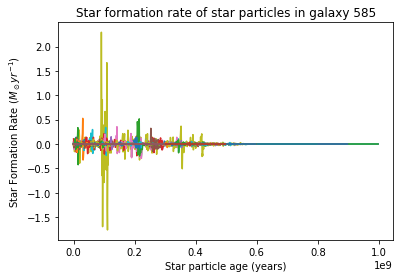

In [34]:
# Saves plots of star formation rates in folder
for i in range(len(mass)):
    print(i)
    sf_rate, n, bins = forward_sfr(i)
    fig = plt.figure()
    plt.plot(bins[:-2], sf_rate)
    plt.title("Star formation rate of star particles in galaxy %i" % i)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")    
    fig.savefig('old_SFRs/galaxy_%i.png' %i)
    fig.clf()
    plt.close()

In [522]:
# Real Star Formation Rate

for i in range(len(mass)):
    print(i)
    fig, _ , n, bins = sfr2(i)
    plt.title("Star formation rate of star particles in galaxy %i" % i)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")    
    fig.savefig('Star Formation Rates/galaxy_%i.png' %i)
    plt.tight_layout()
    fig.clf()
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [450]:
from astropy.convolution import convolve, Gaussian1DKernel

def smoothing(galaxy, resolution):
    sfr_array, n, bins = sfr2(galaxy)
    smoothed_sfr = convolve(sfr_array, Gaussian1DKernel(resolution))
    #plt.plot(bins[:-1], smoothed_sfr)
    #plt.title("Smoothed star formation rate of star particles in galaxy %i" % galaxy)
    #plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    #plt.xlabel("Star particle age (years)")
    return np.array(smoothed_sfr), n, bins

In [451]:
#OLD AND PRETTY MESSED UP

def extrema(galaxy):
    smoothed_sfr, n, bins = smoothing(galaxy)
    maxima = list(signal.argrelextrema(smoothed_sfr, np.greater)[0])
    minima = list(signal.argrelextrema(smoothed_sfr, np.less)[0])
    print(maxima)
    print(minima)
    if (len(minima) == 0):
        if (len(maxima) == 1):
            minima = np.append(minima, len(smoothed_sfr)-1)  
        else:
            minima.append(maxima[1] - 1)
    for i in range(len(minima)):             
        if (minima[i] < maxima[i]):
            print('oh')
            minima.insert(i, maxima[i+1] - 1)      
    if (len(minima) < len(maxima)):
        minima = np.append(minima, len(smoothed_sfr)-1)  
    print(maxima)
    print(minima)
    return np.array(maxima, dtype = int), np.array(minima, dtype = int)

In [513]:
def extrema2(galaxy, resolution):
    smoothed_sfr, n, bins = smoothing(galaxy, resolution)
    maxima = signal.find_peaks(smoothed_sfr, height = 0.005 * max(smoothed_sfr))
    return np.array(maxima[0])

In [338]:
# OLD: Constant width 

def find_tend_idx2(galaxy):
    smoothed_sfr, n, bins = smoothing(galaxy)
    maxima = extrema2(galaxy)
    t = 0.1 * smoothed_sfr[maxima]
    idx = np.zeros(len(maxima), dtype = int)
    for i in range(len(maxima)):
        search_array = np.asarray(smoothed_sfr[maxima[i]:maxima[i] + 20])
        idx[i] = (np.abs(search_array - t[i])).argmin()
    return idx

In [511]:
def find_tend_idx3(galaxy, resolution):
    smoothed_sfr, n, bins = smoothing(galaxy, resolution)
    maxima = extrema2(galaxy, resolution)
    t = 0.1 * smoothed_sfr[maxima]
    idx = np.zeros(len(maxima), dtype = int)
    if (len(maxima) > 1):
        max_width = np.diff(maxima)
        widths = np.array(signal.peak_widths(smoothed_sfr, maxima, rel_height= 0.9, wlen = 0.5 * int(np.mean(max_width)))[0], dtype = int)
    else:
        widths = np.array(signal.peak_widths(smoothed_sfr, maxima, rel_height= 0.9)[0], dtype = int)
    for i in range(len(maxima)):
        if (widths[i] == 0):
            widths[i] = 20
        search_array = np.asarray(smoothed_sfr[maxima[i]:maxima[i] + widths[i]])
        idx[i] = (np.abs(search_array - t[i])).argmin()
    return idx, widths
    

[102 102 134 170 205 244 275 530 387 530 476 530]
[ 30  77 124 147 191 230 260 292 371 405 450 498]
[ 72  25  10  23  14  14  15 238  16 125  26  32]
[31.64762555 31.91074488 14.64299347 47.93943561 19.52306978 22.79619495
 66.24449257 36.43729318 23.22662923 27.06526391 31.61473608 28.52456596]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

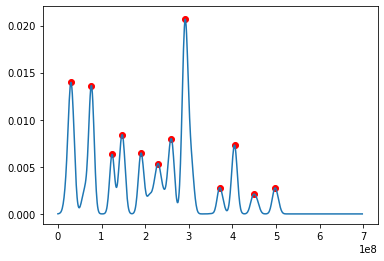

In [509]:

smoothed_sfr, n, bins = smoothing(12,5)
#maxima, minima = extrema(0)
maxima = extrema2(12,5)
#print(maxima)

max_width = np.diff(maxima)
#print(max_width)

widths = signal.peak_widths(smoothed_sfr, maxima, rel_height= 0.9) #, #wlen = max(max_width))#, prominence_data=None, wlen=None)
a, b, c = signal.peak_prominences(smoothed_sfr, maxima)

print(c)
print(maxima)
print(c-maxima)

width_array = np.array(widths[0], dtype = int)

print(widths[0])
#print(0.1 * smoothed_sfr[maxima])

plt.plot(bins[:-1], smoothed_sfr)
plt.scatter(bins[maxima], smoothed_sfr[maxima], color = 'r')
#plt.scatter(bins[minima], smoothed_sfr[minima], color = 'r')


#times = find_tend_idx(1)
#times = find_tend_idx2(1)
times = find_tend_idx3(12, 5)
#print(times)

#for i in range(len(times)):
    #print(smoothed_sfr[maxima[i]:maxima[i]+width_array[i]][times[i]])


#[plt.axvline(bins[maxima[i]:minima[i]][times[i]], color = 'k') for i in range(len(times))]
[plt.axvline(bins[maxima[i]:maxima[i]+width_array[i]][times[i]], color = 'k') for i in range(len(times))]

In [456]:
def plot_tend(galaxy, resolution):
    smoothed_sfr, n, bins = smoothing(galaxy, resolution)
    maxima = extrema2(galaxy, resolution)
    plt.plot(bins[:-1], smoothed_sfr)
    plt.scatter(bins[maxima], smoothed_sfr[maxima], color = 'r')
    times, widths = find_tend_idx3(galaxy, resolution)
    [plt.axvline(bins[maxima[i]:maxima[i]+ widths[i]][times[i]], color = 'k') for i in range(len(times))]
    plt.title("Smoothed Star formation rate of star particles in galaxy %i" % galaxy)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")

[ 17  60  81  99 156 210 285 335 397 463 563]
100
[ 43  21  18  57  54  75  50  62  66 100]
[28 20  8  5 21 36 34 25 24 24 24]


Text(0.5, 0, 'Star particle age (years)')

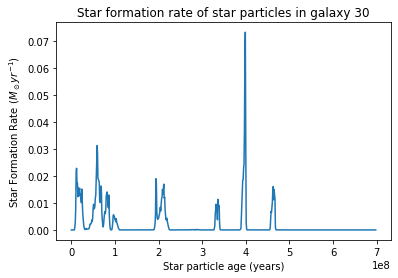

In [494]:


#plot_tend(30,5)

times, widths, max_width = find_tend_idx3(30,5)
maxima = extrema2(30,5)
print(maxima)
print(maxima[-1]-maxima[-2])

print(max_width)
print(widths)

plt.figure()
sfr_array, n, bins = sfr2(30)
plt.plot(bins[:-1], sfr_array)
plt.title("Star formation rate of star particles in galaxy %i" % 30)
plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
plt.xlabel("Star particle age (years)")

In [514]:
# End Time

for i in range(len(mass)):
    print(i)
    fig = plt.figure()
    plot_tend(i,5)
    plt.title("Smoothed star formation rate of star particles in galaxy %i" % i)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")    
    fig.savefig('Starburst End Times/galaxy_%i.png' %i)
    plt.tight_layout()
    fig.clf()
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [518]:
# Requiring some modifications

larger_stdev = [8, 29, 60, 99, 119, 140, 181, 331]
smaller_stdev = [13, 16, 30, 112, 200, 263, 533]

for i in larger_stdev:
    print(i)
    fig = plt.figure()
    plot_tend(i,8)
    plt.title("Smoothed star formation rate of star particles in galaxy %i" % i)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")    
    fig.savefig('Starburst End Times Modifications/galaxy_%i.png' %i)
    plt.tight_layout()
    fig.clf()
    plt.close()
    
for i in smaller_stdev:
    print(i)
    fig = plt.figure()
    plot_tend(i,3)
    plt.title("Smoothed star formation rate of star particles in galaxy %i" % i)
    plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
    plt.xlabel("Star particle age (years)")    
    fig.savefig('Starburst End Times Modifications/galaxy_%i.png' %i)
    plt.tight_layout()
    fig.clf()
    plt.close()
    

8
29
60
99
119
140
181
331
13
16
30
112
200
263
533


In [528]:
fig = plt.figure()
plot_tend(8,9)
plt.title("Smoothed star formation rate of star particles in galaxy %i" % 8)
plt.ylabel("Star Formation Rate ($M_\odot yr^{-1}$)")
plt.xlabel("Star particle age (years)")    
fig.savefig('Starburst End Times Modifications/galaxy_%i.png' %8)
plt.tight_layout()
fig.clf()
plt.close()

[0.00e+00 6.30e+07 1.22e+08 1.50e+08 1.89e+08 2.32e+08 2.88e+08 4.05e+08
 4.47e+08 4.96e+08]


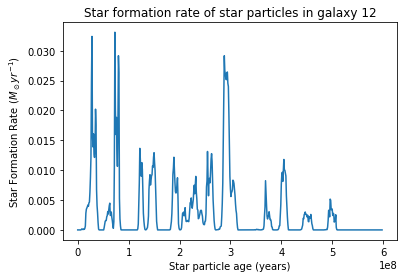

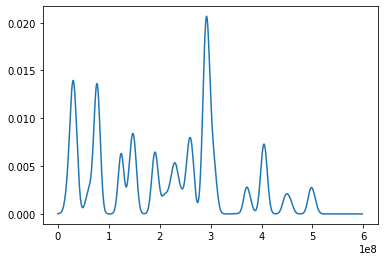

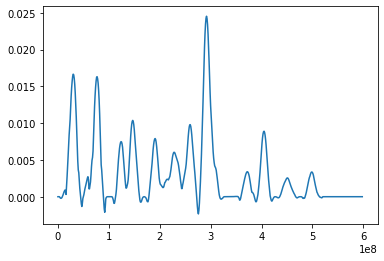

In [120]:
_, sfr_array, n, bins = sfr2(12)

smoothed = ndimage.gaussian_filter(sfr_array, sigma = 5)

smoothed2 = signal.savgol_filter(sfr_array, window_length = 25, polyorder = 2, mode = 'constant')



plt.figure()
plt.plot(bins[:-1], smoothed)

plt.figure()
plt.plot(bins[:-1], smoothed2)
